In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from IPython.display import display_html 

# Data Cleaning

In [185]:
pd.read_csv('Online_Cars_Sale_Marketplace.csv')

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [186]:
original_frame = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

In [187]:
original_frame.dtypes

Year                       int64
Make                      object
Model                     object
Used/New                  object
Price                     object
ConsumerRating           float64
ConsumerReviews            int64
SellerType                object
SellerName                object
SellerRating             float64
SellerReviews              int64
StreetName                object
State                     object
Zipcode                   object
DealType                  object
ComfortRating            float64
InteriorDesignRating     float64
PerformanceRating        float64
ValueForMoneyRating      float64
ExteriorStylingRating    float64
ReliabilityRating        float64
ExteriorColor             object
InteriorColor             object
Drivetrain                object
MinMPG                     int64
MaxMPG                     int64
FuelType                  object
Transmission              object
Engine                    object
VIN                       object
Stock#    

In [188]:
#getting rid of c
original_frame.drop(original_frame[original_frame['Price']=='Not Priced'].index, inplace = True)

original_frame['Price']=original_frame['Price'].str.replace(',','')
original_frame['Price']=original_frame['Price'].str.replace('$','')
original_frame['Price']=original_frame['Price'].astype(int)

/var/folders/zr/km3s5d057fq865502skt0rc80000gn/T/ipykernel_43428/2083359120.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  original_frame['Price']=original_frame['Price'].str.replace('$','')


In [189]:
original_frame['Used/New'] = np.where(original_frame['Used/New'] != 'New', 'Used', original_frame['Used/New'])
original_frame['Used/New'].value_counts()

Used    9374
Name: Used/New, dtype: int64

In [190]:
#turning listing prices from objects into integers and turning Used/New column into string format. 

In [191]:
original_frame['Used/New']=original_frame['Used/New'].astype(str)

In [192]:
original_frame['SellerType']

0       Dealer
1       Dealer
2       Dealer
3       Dealer
4       Dealer
         ...  
9374    Dealer
9375    Dealer
9376    Dealer
9377    Dealer
9378    Dealer
Name: SellerType, Length: 9374, dtype: object

In [193]:
original_frame['Drivetrain']=original_frame['Drivetrain'].astype(str)
original_frame.drop(original_frame[original_frame['Drivetrain']=='-'].index, inplace = True)

In [194]:
original_frame

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


# Most popular manufacturers

In [195]:
indexed_by_make = original_frame.set_index(['Make'])
avg_review_score_make = indexed_by_make.groupby(['Make'])['ConsumerRating'].mean()
count_reviews_maker = original_frame.groupby(['Make'])['ConsumerReviews'].sum()
count_reviews_maker
review_and_count = pd.DataFrame({
    'Average Review' : avg_review_score_make,
    'Num of Reviews': count_reviews_maker
})
top_performers = review_and_count[(review_and_count['Average Review']>=4.70) & (review_and_count['Num of Reviews']>= 7500)]
top_performers

,Average Review,Num of Reviews
Make,,
Audi,4.758491,16577
BMW,4.754083,42044
Buick,4.714035,13126
Dodge,4.774483,11575
Ford,4.722241,142278
Honda,4.772817,235519
Hyundai,4.741509,37680
Jeep,4.740081,117429
Kia,4.765417,40625


In [196]:
# This shows car manufacturers with ratings of =>4.7 and have at least 200 ratings. 
# High average ratings and high # of reviews should be indicative of a popular manufacturer. 
# Plot displays Average Number of Reviews Column.
# Honda has the highest number of consumer reviews and high rating, indicating a popular manufacturer.
# The three most popular manufacturers are Honda, Toyota, and Ford.

(8000.0, 13000.0)

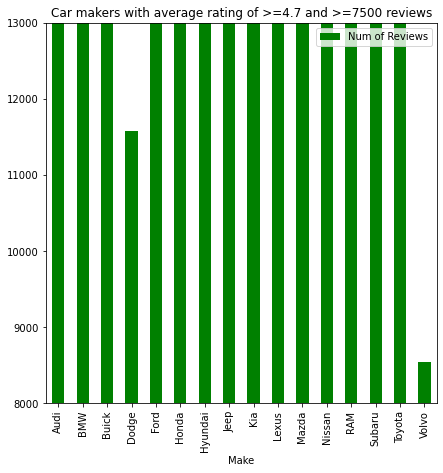

In [197]:
top_performers.plot.bar(
                             y= 'Num of Reviews' ,                             color ='green', 
                             figsize = (7,7),
                            title = 'Car makers with average rating of >=4.7 and >=7500 reviews')
plt.ylim(8000,13000, 500 )

In [198]:
three_makers = ['Toyota', 'Honda', 'Ford']
top_three = original_frame[original_frame['Make'].isin(three_makers)]
top_three.head(10)
# Filtered original datframe for the top three highest rated and most popular car manufacturers.

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
5,2012,Toyota,4Runner SR5,Used,23541,4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,–,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469
6,2017,Honda,HR-V LX,Used,20995,4.6,200,Dealer,Downtown Toyota-Subaru of Oakland,4.4,...,Black,Front-wheel Drive,28,34,Gasoline,Automatic CVT,1.8L I4 16V MPFI SOHC,3CZRU5H32HG703897,T1480,10458
8,2021,Honda,Pilot Touring 8-Passenger,Used,44299,4.8,63,Dealer,EchoPark Automotive Phoenix,4.9,...,Beige,All-wheel Drive,19,26,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H90MB052856,YMB052856,14445
16,2018,Ford,Explorer XLT,Used,32995,4.8,265,Dealer,Driven Auto Sales,5.0,...,Black,Four-wheel Drive,16,22,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,1FM5K8D89JGB20589,P2214,61294
18,2018,Ford,Explorer XLT,Used,33341,4.8,265,Dealer,Larry H. Miller Used Car Supermarket Sandy,3.9,...,–,Four-wheel Drive,16,22,Gasoline,Automatic,Regular Unleaded V-6 3.5 L/213,1FM5K8D82JGC77140,R5631,81375
19,2018,Ford,Explorer XLT,Used,30489,4.8,265,Dealer,EchoPark Automotive Salt Lake City Delivery Ce...,3.0,...,Ebony Black,Front-wheel Drive,17,24,Gasoline,6-Speed Automatic,2.3L I4 16V GDI DOHC Turbo,1FM5K7DH7JGC86801,PJGC86801,28357
20,2018,Ford,Explorer XLT,Used,32489,4.8,265,Dealer,EchoPark Automotive Salt Lake City Delivery Ce...,3.0,...,Ebony Black,Four-wheel Drive,16,22,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,1FM5K8D81JGC67795,PJGC67795,33188


# Most popular car from each of the three most popular manufacturers

In [199]:
# used exclusively Ratings and Reviews, although there are ratings for performance and comfort etc. 
# Ratings of performance or affordability are not necessarily indicative of popularity. 
Honda = ['Honda']
Honda_data = top_three[top_three['Make'].isin(Honda)]
honda1 =Honda_reviewcount_average = Honda_data.groupby(['Model']).mean()['ConsumerReviews']  
honda2 =Honda_review_average = Honda_data.groupby(['Model']).mean()['ConsumerRating']
honda3 = pd.concat([honda1,honda2], axis = 1)
honda3.sort_values(by = 'ConsumerReviews', ascending = False).head(10)

,ConsumerReviews,ConsumerRating
Model,,
Civic EX,571.272727,4.800000
Civic EX-T,546.000000,4.800000
Accord EX,530.000000,4.766667
CR-V EX-L,497.513228,4.804233
CR-V Touring,486.238095,4.761905
Accord EX-L 2.0T,485.000000,4.800000
Accord LX,482.333333,4.766667
CR-V LX,475.764706,4.800000
CR-V EX,475.025974,4.801299


In [200]:
# Having the highest # of reviews and the highest average review of the highest number of reviews column; 
# Honda Civic Ex wth an average of 571 reviews and 4.8/5 average ratings.

In [201]:
Ford = ['Ford']
Ford_data = top_three[top_three['Make'].isin(Ford)]
Ford1 =Ford_reviewcount_average = Ford_data.groupby(['Model']).mean()['ConsumerReviews']  
Ford2 =Ford_review_average = Ford_data.groupby(['Model']).mean()['ConsumerRating']
Ford3 = pd.concat([Ford1,Ford2], axis = 1)
Ford3.sort_values(by = 'ConsumerReviews', ascending = False).head(10)

,ConsumerReviews,ConsumerRating
Model,,
Escape S,547.750000,4.625000
Escape SE,502.857143,4.695238
F-150 XL,499.428571,4.800000
F-150 Raptor,490.333333,4.800000
F-150 King Ranch,430.750000,4.725000
F-150 Platinum,399.000000,4.785714
F-150,391.000000,4.600000
F-150 Lariat,387.553571,4.785714
Escape Titanium,381.113636,4.647727


In [202]:
# The Fod 150 XL seems to be the most popoular Ford Model
# given it has average number of 500 ratings and  4.8/5 average reviews.

In [203]:
Ford = ['Ford']
Ford_data = top_three[top_three['Make'].isin(Ford)]
Ford1 =Ford_reviewcount_average = Ford_data.groupby(['Model']).mean()['ConsumerReviews']  
Ford2 =Ford_review_average = Ford_data.groupby(['Model']).mean()['ConsumerRating']
Ford3 = pd.concat([Ford1,Ford2], axis = 1)
Ford3.sort_values(by = 'ConsumerReviews', ascending = False).head(10)

,ConsumerReviews,ConsumerRating
Model,,
Escape S,547.750000,4.625000
Escape SE,502.857143,4.695238
F-150 XL,499.428571,4.800000
F-150 Raptor,490.333333,4.800000
F-150 King Ranch,430.750000,4.725000
F-150 Platinum,399.000000,4.785714
F-150,391.000000,4.600000
F-150 Lariat,387.553571,4.785714
Escape Titanium,381.113636,4.647727


In [204]:
# The Toyota Camry XLE seems to be the most popoular Toyota Model with an avrage 545 reviews and average 4.75/5 
Toyota = ['Toyota']
Toyota = top_three[top_three['Make'].isin(Toyota)]
Toyota1 =Toyota_reviewcount_average = Toyota_data.groupby(['Model']).mean()['ConsumerReviews']  
Toyota2 =Toyota_review_average = Toyota_data.groupby(['Model']).mean()['ConsumerRating']
Toyota3 = pd.concat([Toyota1,Toyota2], axis = 1)
Toyota3.sort_values(by = 'ConsumerReviews', ascending = False).head(10)

,ConsumerReviews,ConsumerRating
Model,,
RAV4 Limited,549.419355,4.709677
Camry XLE,545.000000,4.750000
RAV4 XLE,520.309859,4.750704
RAV4 LE,398.723214,4.738393
Highlander LE Plus,363.000000,4.600000
RAV4 Sport,351.333333,4.533333
Highlander LE,330.285714,4.700000
Highlander SE,301.000000,4.625000
Highlander Limited,291.583333,4.754167


In [208]:
top_three = ['Camry XLE', 'Civic EX', 'F-150 XL']
top_three_frame = original_frame[original_frame['Model'].isin(top_three)]
top_three_filtered = top_three_frame[['Make',
                                      'Model',
                                      'Used/New',
                                      'Price',
                                      'ConsumerRating',
                                      'ConsumerReviews',
                                      'SellerType',
                                      'Mileage']]
top_three_filtered 

,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,Mileage
44,Honda,Civic EX,Used,22004,4.8,743,Dealer,35257
51,Honda,Civic EX,Used,23739,4.8,546,Dealer,32333
365,Ford,F-150 XL,Used,34999,4.8,817,Dealer,51960
1572,Ford,F-150 XL,Used,21995,4.8,568,Dealer,87552
2152,Ford,F-150 XL,Used,31300,4.8,568,Dealer,38495
3051,Honda,Civic EX,Used,19995,4.8,743,Dealer,102164
3301,Honda,Civic EX,Used,29100,4.9,275,Dealer,7869
4018,Ford,F-150 XL,Used,28989,4.8,817,Dealer,49624
4227,Honda,Civic EX,Used,20932,4.8,743,Dealer,68879
4828,Toyota,Camry XLE,Used,28541,4.7,781,Dealer,16740


In [212]:
 #Accord Median Price per SellerType
Civic = (top_three_filtered[(original_frame['Model']=='Civic EX')])
F150 = (top_three_filtered[(original_frame['Model']=='F-150 XL')])
Camry = (top_three_filtered[(original_frame['Model']=='Camry XLE')])
Camry

/var/folders/zr/km3s5d057fq865502skt0rc80000gn/T/ipykernel_43428/2611443192.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Civic = (top_three_filtered[(original_frame['Model']=='Civic EX')])
/var/folders/zr/km3s5d057fq865502skt0rc80000gn/T/ipykernel_43428/2611443192.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  F150 = (top_three_filtered[(original_frame['Model']=='F-150 XL')])
/var/folders/zr/km3s5d057fq865502skt0rc80000gn/T/ipykernel_43428/2611443192.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Camry = (top_three_filtered[(original_frame['Model']=='Camry XLE')])


,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,Mileage
4828,Toyota,Camry XLE,Used,28541,4.7,781,Dealer,16740
5743,Toyota,Camry XLE,Used,33900,4.8,309,Dealer,10200


In [215]:
F150

,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,Mileage
365,Ford,F-150 XL,Used,34999,4.8,817,Dealer,51960
1572,Ford,F-150 XL,Used,21995,4.8,568,Dealer,87552
2152,Ford,F-150 XL,Used,31300,4.8,568,Dealer,38495
4018,Ford,F-150 XL,Used,28989,4.8,817,Dealer,49624
6365,Ford,F-150 XL,Used,21995,4.8,568,Dealer,87552
6679,Ford,F-150 XL,Used,49090,4.8,79,Dealer,15762
8926,Ford,F-150 XL,Used,46287,4.8,79,Dealer,19339


In [214]:
Civic

,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,Mileage
44,Honda,Civic EX,Used,22004,4.8,743,Dealer,35257
51,Honda,Civic EX,Used,23739,4.8,546,Dealer,32333
3051,Honda,Civic EX,Used,19995,4.8,743,Dealer,102164
3301,Honda,Civic EX,Used,29100,4.9,275,Dealer,7869
4227,Honda,Civic EX,Used,20932,4.8,743,Dealer,68879
4864,Honda,Civic EX,Used,22997,4.8,743,Dealer,17941
5355,Honda,Civic EX,Used,34649,4.8,546,Dealer,46751
5588,Honda,Civic EX,Used,24471,4.8,546,Dealer,12150
6124,Honda,Civic EX,Used,27687,4.8,546,Dealer,32125
7466,Honda,Civic EX,Used,18000,4.7,307,Dealer,87416
